In [26]:
import os
import sys
import itertools
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.io
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
#import weighted

params = {
    'axes.linewidth': 0.3,
    'xtick.major.size': 1.5,
    'xtick.minor.size': 1,
    'xtick.major.width': 0.3,
    'xtick.minor.width': 0.3,
    'ytick.major.size': 1.5,
    'ytick.minor.size': 1,
    'ytick.major.width': 0.3,
    'ytick.minor.width': 0.3,
}
size = (6,6)
mpl.rcParams.update(params)
pti = 0.3528 / 25.4

diag_size = 5
out_size = 20
alpha = 0.3
alphamc = 0.1

## Single dataset - Methods comparison

In [27]:
plot_path = "CouplingsEvenBigger/"
def max_fun(couple):
    match = np.zeros(np.shape(couple))
    n2 = np.shape(couple)[1]
    match[np.argmax(couple, axis = 0),np.linspace(0,n2-1,n2,dtype = int)] = np.max(couple, axis = 0)
    return(match)

CONFIG = []
PARAMBS = []

for o in [0.25, 0.5, 0.75] : 
    for sigmaM in [0.01]:
        for sigmaRT in [0.5]:
            for sigmaFI in [0.5]:
                CONFIG.append([o, sigmaM, sigmaRT, sigmaFI, 'smooth',1])


for mg in [0.01]:
    for d in ['MAD']:
        for k in [4]:
            PARAMBS.append([mg, d, k])
                
param = PARAMBS[0]

### Low overlap

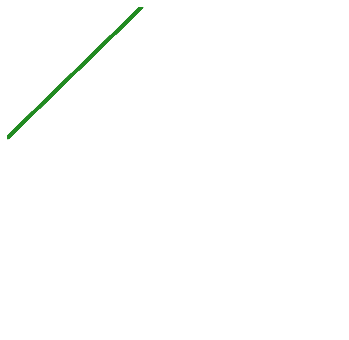

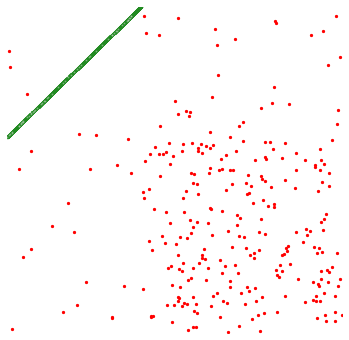

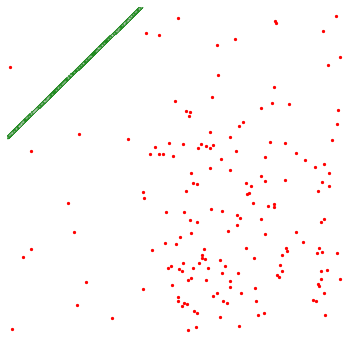

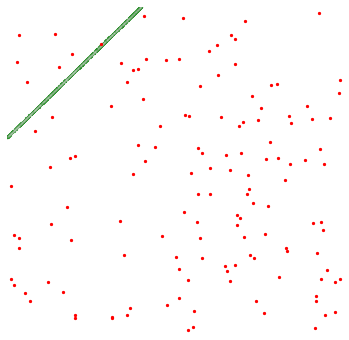

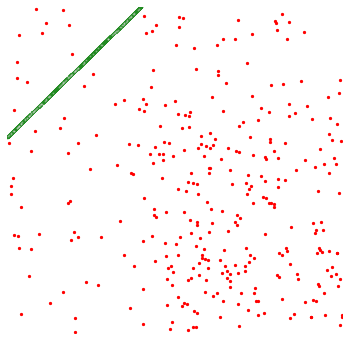

In [28]:
config = CONFIG[0]

file_true = '../../DATA/TRUE_'+str(config)+'.npy'
true = np.load(file_true)

true = true.astype('float64')
true[true > 0] = 1

true_positives = np.where(true == 1)

plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.xlim(0, true.shape[0])
plt.ylim(0, true.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'True_0.25.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

###########


fileGM = '../../GromovMatcher/RES/GMcouple_topRT_'+str(config)+'_'+str(param)+'.npy'
coupling = np.load(fileGM, allow_pickle = True)

coupling = coupling.astype('float64')
coupling = coupling/np.max(coupling)
matching = max_fun(max_fun(coupling).T).T
thr_matching = matching.copy()
thr_matching[thr_matching<0.5] = 0
matching[matching>0] = 1
thr_matching[thr_matching>0] = 1


true_positives = np.where((matching == 1) & (true == 1))
false_positives = np.where((matching == 1) & (true == 0))
false_negatives = np.where((matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alpha)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'GWcoupling_0.25.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()



true_positives = np.where((thr_matching == 1) & (true == 1))
false_positives = np.where((thr_matching == 1) & (true == 0))
false_negatives = np.where((thr_matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alpha)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'TGWcoupling_0.25.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

###########


fileMC = '../../metabCombiner/RES_unsup/binGap0.01/couple_'+str(config).replace("'","")+'.npy'

coupling = np.load(fileMC, allow_pickle = True)

coupling = coupling.astype('float64')
coupling = coupling/np.max(coupling)
matching = max_fun(max_fun(coupling).T).T
thr_matching = matching.copy()
matching[matching>0] = 1
thr_matching[thr_matching>0] = 1


true_positives = np.where((matching == 1) & (true == 1))
false_positives = np.where((matching == 1) & (true == 0))
false_negatives = np.where((matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alphamc)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'mCcoupling_0.25.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

###########


fileM2S = '../../M2S/RES/M2S_couple_'+str(config).replace("'","")+'.mat'
coupling = scipy.io.loadmat(fileM2S)['matching'].astype('float64')

coupling = coupling/np.max(coupling)
matching = max_fun(max_fun(coupling).T).T
thr_matching = matching.copy()
matching[matching>0] = 1


true_positives = np.where((matching == 1) & (true == 1))
false_positives = np.where((matching == 1) & (true == 0))
false_negatives = np.where((matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alpha)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'M2Scoupling_0.25.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()



### Medium overlap

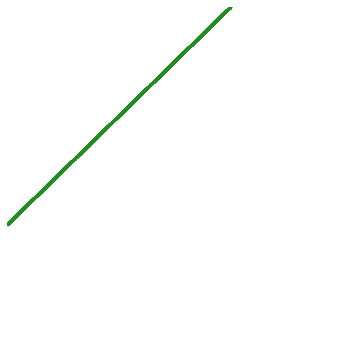

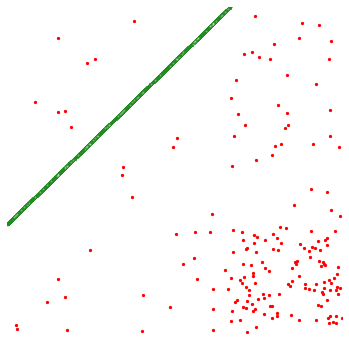

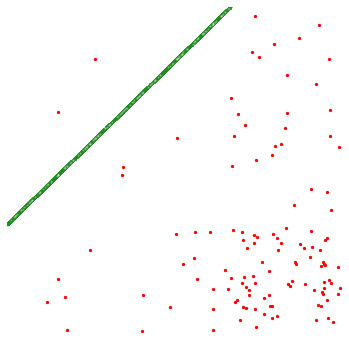

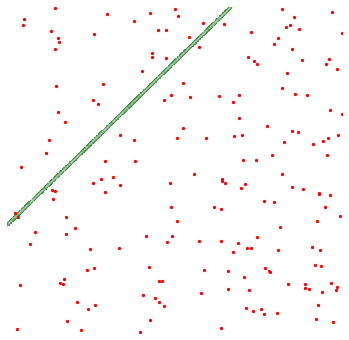

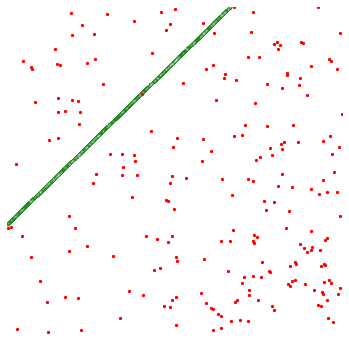

In [29]:
config = CONFIG[1]

file_true = '../../DATA/TRUE_'+str(config)+'.npy'
true = np.load(file_true)

true = true.astype('float64')
true[true > 0] = 1

true_positives = np.where(true == 1)

plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.xlim(0, true.shape[0])
plt.ylim(0, true.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'True_0.5.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

###########


fileGM = '../../GromovMatcher/RES/GMcouple_topRT_'+str(config)+'_'+str(param)+'.npy'
coupling = np.load(fileGM, allow_pickle = True)

coupling = coupling.astype('float64')
coupling = coupling/np.max(coupling)
matching = max_fun(max_fun(coupling).T).T
thr_matching = matching.copy()
thr_matching[thr_matching<0.5] = 0
matching[matching>0] = 1
thr_matching[thr_matching>0] = 1


true_positives = np.where((matching == 1) & (true == 1))
false_positives = np.where((matching == 1) & (true == 0))
false_negatives = np.where((matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alpha)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xticks([])
plt.yticks([])
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.gca().axis('off')
plt.savefig(plot_path+'GWcoupling_0.5.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()


true_positives = np.where((thr_matching == 1) & (true == 1))
false_positives = np.where((thr_matching == 1) & (true == 0))
false_negatives = np.where((thr_matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alpha)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'TGWcoupling_0.5.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

###########


fileMC = '../../metabCombiner/RES_unsup/binGap0.01/couple_'+str(config).replace("'","")+'.npy'

coupling = np.load(fileMC, allow_pickle = True)

coupling = coupling.astype('float64')
coupling = coupling/np.max(coupling)
matching = max_fun(max_fun(coupling).T).T
thr_matching = matching.copy()
thr_matching[thr_matching<0.5] = 0
matching[matching>0] = 1
thr_matching[thr_matching>0] = 1


true_positives = np.where((matching == 1) & (true == 1))
false_positives = np.where((matching == 1) & (true == 0))
false_negatives = np.where((matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alphamc)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'mCcoupling_0.5.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

###########


fileM2S = '../../M2S/RES/M2S_couple_'+str(config).replace("'","")+'.mat'
coupling = scipy.io.loadmat(fileM2S)['matching'].astype('float64')

coupling = coupling/np.max(coupling)
matching = max_fun(max_fun(coupling).T).T
thr_matching = matching.copy()
matching[matching>0] = 1


true_positives = np.where((matching == 1) & (true == 1))
false_positives = np.where((matching == 1) & (true == 0))
false_negatives = np.where((matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alpha)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'M2Scoupling_0.5.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()


### High overlap

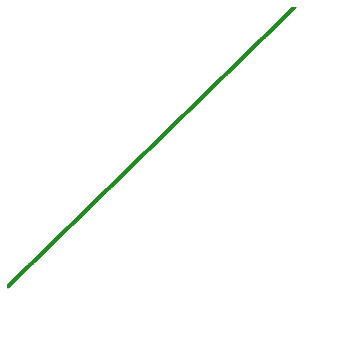

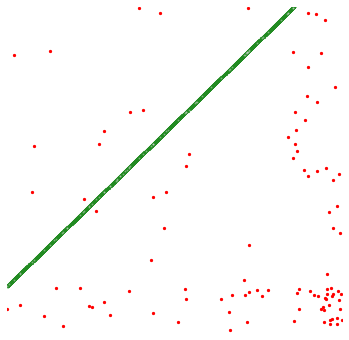

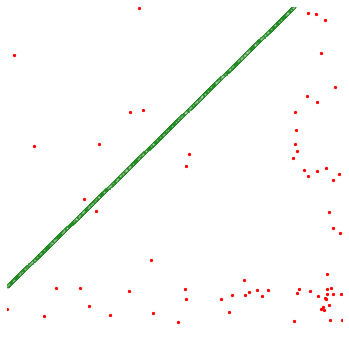

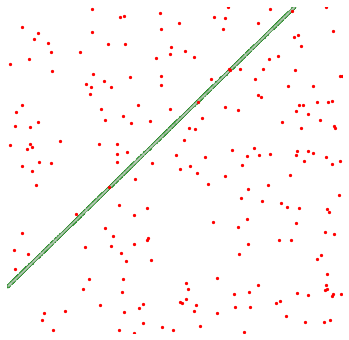

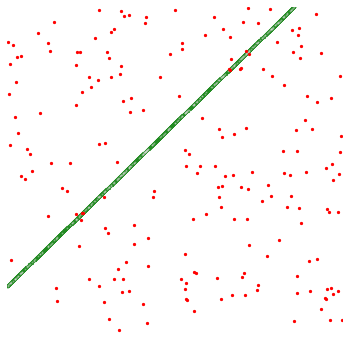

In [30]:
config = CONFIG[2]
file_true = '../../DATA/TRUE_'+str(config)+'.npy'
true = np.load(file_true)

true = true.astype('float64')
true[true > 0] = 1

true_positives = np.where(true == 1)

plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.xlim(0, true.shape[0])
plt.ylim(0, true.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'True_0.75.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

###########


fileGM = '../../GromovMatcher/RES/GMcouple_topRT_'+str(config)+'_'+str(param)+'.npy'
coupling = np.load(fileGM, allow_pickle = True)

coupling = coupling.astype('float64')
coupling = coupling/np.max(coupling)
matching = max_fun(max_fun(coupling).T).T
thr_matching = matching.copy()
thr_matching[thr_matching<0.5] = 0
matching[matching>0] = 1
thr_matching[thr_matching>0] = 1


true_positives = np.where((matching == 1) & (true == 1))
false_positives = np.where((matching == 1) & (true == 0))
false_negatives = np.where((matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alpha)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xticks([])
plt.yticks([])
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.gca().axis('off')
plt.savefig(plot_path+'GWcoupling_0.75.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()


true_positives = np.where((thr_matching == 1) & (true == 1))
false_positives = np.where((thr_matching == 1) & (true == 0))
false_negatives = np.where((thr_matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alpha)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'TGWcoupling_0.75.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

###########


fileMC = '../../metabCombiner/RES_unsup/binGap0.01/couple_'+str(config).replace("'","")+'.npy'

coupling = np.load(fileMC, allow_pickle = True)

coupling = coupling.astype('float64')
coupling = coupling/np.max(coupling)
matching = max_fun(max_fun(coupling).T).T
thr_matching = matching.copy()
thr_matching[thr_matching<0.5] = 0
matching[matching>0] = 1
thr_matching[thr_matching>0] = 1


true_positives = np.where((matching == 1) & (true == 1))
false_positives = np.where((matching == 1) & (true == 0))
false_negatives = np.where((matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alphamc)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xticks([])
plt.yticks([])
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.gca().axis('off')
plt.savefig(plot_path+'mCcoupling_0.75.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

###########


fileM2S = '../../M2S/RES/M2S_couple_'+str(config).replace("'","")+'.mat'
coupling = scipy.io.loadmat(fileM2S)['matching'].astype('float64')

coupling = coupling/np.max(coupling)
matching = max_fun(max_fun(coupling).T).T
thr_matching = matching.copy()
matching[matching>0] = 1


true_positives = np.where((matching == 1) & (true == 1))
false_positives = np.where((matching == 1) & (true == 0))
false_negatives = np.where((matching == 0) & (true == 1))


plt.figure(figsize=size)
plt.scatter(true_positives[1]+0.5, true_positives[0]+0.5, color="forestgreen", marker=".", s=out_size)
plt.scatter(false_negatives[1]+0.5, false_negatives[0]+0.5, color="gainsboro", marker=".", s=diag_size, alpha = alpha)
plt.scatter(false_positives[1]+0.5, false_positives[0]+0.5, color="red", marker=".", s=out_size)
plt.xlim(0, matching.shape[0])
plt.ylim(0, matching.shape[1])
plt.xticks([])
plt.yticks([])
plt.gca().axis('off')
plt.savefig(plot_path+'M2Scoupling_0.75.png', dpi = 100, bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()


## GM only

In [ ]:
plot_path = "Couplings/"
def max_fun(couple):
    match = np.zeros(np.shape(couple))
    n2 = np.shape(couple)[1]
    match[np.argmax(couple, axis = 0),np.linspace(0,n2-1,n2,dtype = int)] = np.max(couple, axis = 0)
    return(match)

CONFIG = []
PARAMBS = []

for o in [0.25, 0.5, 0.75] : 
    for sigmaM in [0.01]:
        for sigmaRT in [0.5]:
            for sigmaFI in [0.5]:
                CONFIG.append([o, sigmaM, sigmaRT, sigmaFI, 'smooth',1])


for mg in [0.01]:
    for d in ['MAD']:
        for k in [4]:
            PARAMBS.append([mg, d, k])
                
param = PARAMBS[0]

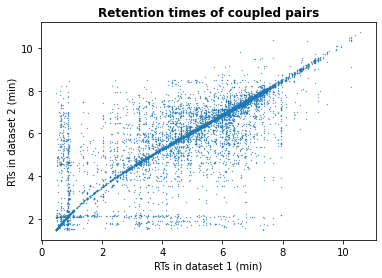

In [18]:
pairs = np.nonzero(crude)

x = rs1[pairs[0]]
y = rs2[pairs[1]]

order = np.argsort(x)
x1 = x[order]
y1 = y[order]
    
plt.figure()
plt.title('Retention times of coupled pairs', fontweight='bold')
plt.scatter(x1, y1, s = 0.1)
plt.xlabel('RTs in dataset 1 (min)')
plt.ylabel('RTs in dataset 2 (min)')
plt.savefig(plot_path+'Crude_RT_scatterplot.png', dpi = 300)

RT scatterplot with double max

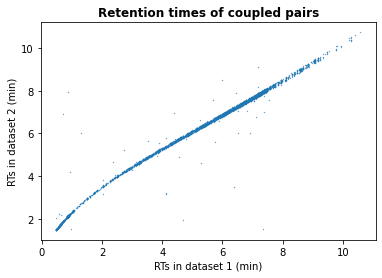

In [19]:
pairs = np.nonzero(crude_match)

x = rs1[pairs[0]]
y = rs2[pairs[1]]

order = np.argsort(x)
x1 = x[order]
y1 = y[order]
    
plt.figure()
plt.title('Retention times of coupled pairs', fontweight='bold')
plt.scatter(x1, y1, s = 0.1)
plt.xlabel('RTs in dataset 1 (min)')
plt.ylabel('RTs in dataset 2 (min)')
plt.savefig(plot_path+'Crude_matching_RT_scatterplot.png', dpi = 300)

#### Filtered coupling

In [22]:
filtered,_ = np.load("../RES_temp/GMcouple_[0.8, 0, 'smooth', 1]_[0.01, 1].npy", allow_pickle=True)
filtered = filtered.astype('float64')

Filtered coupling matrix

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


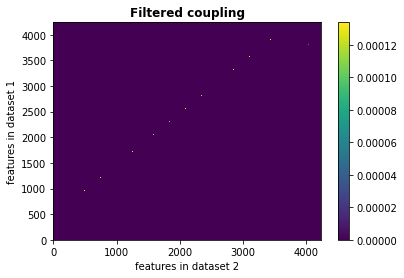

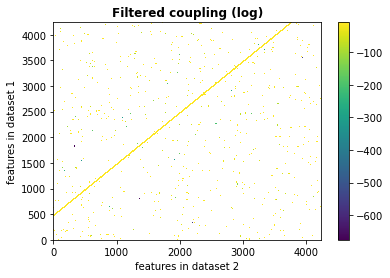

In [23]:
plt.figure()
plt.title('Filtered coupling', fontweight='bold')
plt.xlabel('features in dataset 2')
plt.ylabel('features in dataset 1')
plt.pcolormesh(filtered)
plt.colorbar()
plt.savefig(plot_path+'Filtered_coupling.png', dpi = 300)

plt.figure()
plt.title('Filtered coupling (log)', fontweight='bold')
plt.xlabel('features in dataset 2')
plt.ylabel('features in dataset 1')
plt.pcolormesh(np.log(filtered))
plt.colorbar()
plt.savefig(plot_path+'Filtered_coupling_log.png', dpi = 300)

With double max

In [24]:
filtered_match = max_fun(max_fun(filtered).T).T

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


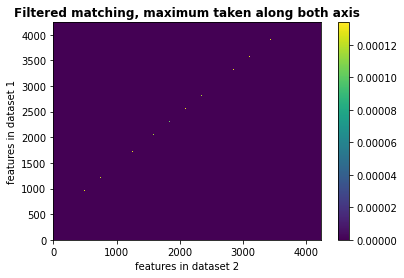

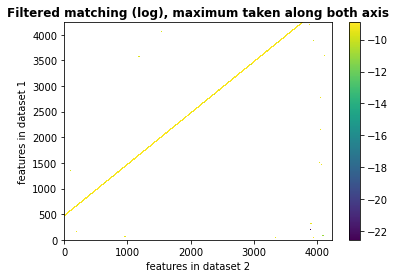

In [25]:
plt.figure()
plt.title('Filtered matching, maximum taken along both axis', fontweight='bold')
plt.xlabel('features in dataset 2')
plt.ylabel('features in dataset 1')
plt.pcolormesh(filtered_match)
plt.colorbar()
plt.savefig(plot_path+'Filtered_matching.png', dpi = 300)

plt.figure()
plt.title('Filtered matching (log), maximum taken along both axis', fontweight='bold')
plt.xlabel('features in dataset 2')
plt.ylabel('features in dataset 1')
plt.pcolormesh(np.log(filtered_match))
plt.colorbar()
plt.savefig(plot_path+'Filtered_matching_log.png', dpi = 300)

Same with lower res for visibility

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


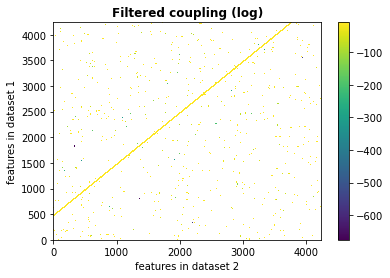

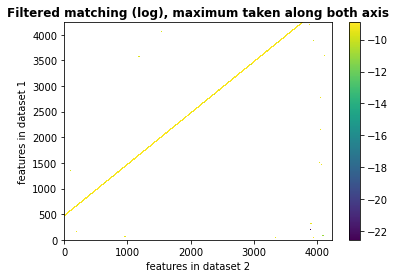

In [26]:
res = 120

plt.figure()
plt.title('Filtered coupling (log)', fontweight='bold')
plt.xlabel('features in dataset 2')
plt.ylabel('features in dataset 1')
plt.pcolormesh(np.log(filtered))
plt.colorbar()
plt.savefig(plot_path+'Filtered_coupling_log_lowerDPI.png', dpi = res)

plt.figure()
plt.title('Filtered matching (log), maximum taken along both axis', fontweight='bold')
plt.xlabel('features in dataset 2')
plt.ylabel('features in dataset 1')
plt.pcolormesh(np.log(filtered_match))
plt.colorbar()
plt.savefig(plot_path+'Filtered_matching_log_lowerDPI.png', dpi = res)

Scatterplot filtered coupling and drift estimation

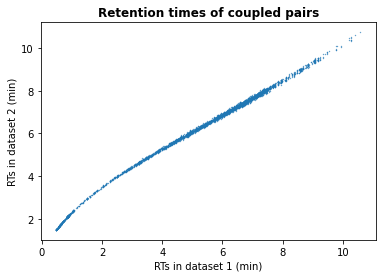

In [27]:
pairs = np.nonzero(filtered)

x = rs1[pairs[0]]
y = rs2[pairs[1]]

order = np.argsort(x)
x1 = x[order]
y1 = y[order]
    
plt.figure()
plt.title('Retention times of coupled pairs', fontweight='bold')
plt.scatter(x1, y1, s = 0.1)
plt.xlabel('RTs in dataset 1 (min)')
plt.ylabel('RTs in dataset 2 (min)')
plt.savefig(plot_path+'Filtered_RT_scatterplot.png', dpi = 300)

## Simulations

For overlap = 0.8, smooth drift, and optimal parameters.

Sensitivity and specificity w/r to matching magnitude

In [44]:
def Accuracy(prediction, true_coupling):
    true = true_coupling.copy()
    true[true > 0] = 1
    pred = prediction.copy()
    pred[pred > 0] = 1
    # Mets matched
    subset_matched = np.where(true == 1)
    TP = np.sum(pred[subset_matched])
    FN = np.sum(pred[subset_matched] == 0)
    # Mets unmatched
    subset_unmatched = np.where(np.sum(true, axis = 0) == 0)
    FP = np.sum(np.sum(pred, axis = 0)[subset_unmatched])
    TN = np.sum(np.sum(np.sum(pred, axis = 0)[subset_unmatched] == 0))
    return(np.array([TP/(TP+FN),TN/(TN+FP)]))

In [64]:
Accuracy(crude_match, true)

array([0.9888535 , 0.91313559])

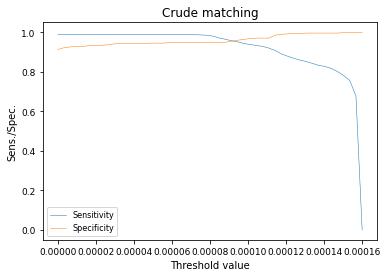

In [67]:
thr = np.linspace(0, 0.00016, 50)
spec = np.zeros(50)
sens = np.zeros(50)

i = 0
for t in thr:
    temp = crude_match.copy()
    temp[temp < t] = 0
    acc = Accuracy(temp, true)
    sens[i] = acc[0]
    spec[i] = acc[1]
    i += 1
    
plt.figure()
plt.plot(thr, sens, linewidth = 0.5, label = 'Sensitivity')
plt.plot(thr, spec, linewidth = 0.5, label = 'Specificity')
plt.legend(prop={'size': 8})
plt.title('Crude matching')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Threshold value')
plt.ylabel('Sens./Spec.')
plt.savefig(plot_path+'Crude_matching_accuracy.png', dpi = 300)

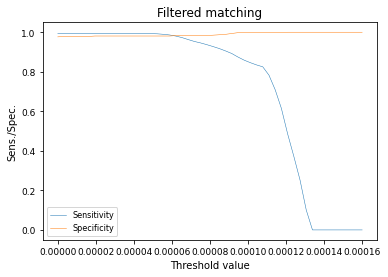

In [68]:
thr = np.linspace(0, 0.00016, 50)
spec = np.zeros(50)
sens = np.zeros(50)

i = 0
for t in thr:
    temp = filtered_match.copy()
    temp[temp < t] = 0
    acc = Accuracy(temp, true)
    sens[i] = acc[0]
    spec[i] = acc[1]
    i += 1

sens[np.isnan(sens)] = 1.   

plt.figure()
plt.plot(thr, sens, linewidth = 0.5, label = 'Sensitivity')
plt.plot(thr, spec, linewidth = 0.5, label = 'Specificity')
plt.legend(prop={'size': 8})
plt.title('Filtered matching')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Threshold value')
plt.ylabel('Sens./Spec.')
plt.savefig(plot_path+'Filtered_matching_accuracy.png', dpi = 300)